# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from time import mktime
import json as json
import pprint as pprint
from datetime import datetime, date, time, timedelta


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities

['akropong',
 'illoqqortoormiut',
 'nemencine',
 'lewistown',
 'mar del plata',
 'narrabri',
 'nikolskoye',
 'dolbeau',
 'atuona',
 'naryan-mar',
 'naze',
 'alice springs',
 'uarini',
 'kapaa',
 'barrow',
 'yulara',
 'busselton',
 'miami',
 'namatanai',
 'porto novo',
 'bambous virieux',
 'yellowknife',
 'saskylakh',
 'isangel',
 'ternate',
 'iqaluit',
 'rio grande',
 'taolanaro',
 'mataura',
 'ponta do sol',
 'aklavik',
 'trincomalee',
 'vaini',
 'albany',
 'ixtapa',
 'srednekolymsk',
 'inhambane',
 'cabo san lucas',
 'ushuaia',
 'tucurui',
 'rikitea',
 'kundiawa',
 'puerto ayora',
 'bid',
 'punta arenas',
 'sao filipe',
 'bredasdorp',
 'chuy',
 'talnakh',
 'camacha',
 'cherskiy',
 'ugoofaaru',
 'qaanaaq',
 'galveston',
 'hermanus',
 'ewa beach',
 'port-cartier',
 'nanchang',
 'penzance',
 'kita',
 'tsogni',
 'olafsvik',
 'bluff',
 'digoin',
 'baruun-urt',
 'tecoanapa',
 'kiunga',
 'polovinnoye',
 'samusu',
 'ilulissat',
 'avarua',
 'jabiru',
 'tuktoyaktuk',
 'chara',
 'traverse city'

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
# This could take a minute...  I am filling the lists 
# for all of the dataframe objects from within the loop.
# The try / except / continue script that 
# I'm using is eliminating any entry without data!

City = []
Country = []
Lat = []
Lng = []
Date = []
Descript = []
Cloudiness = []
Max_Temp = []
Humidity = []
Wind_Speed = []
response = []
print('Beginning Data Retrieval')
print('----------------------------')
for i in range (len(cities)):
    response.append(requests.get(query_url + cities[i]).json())
    try: 
        City.append(response[i]["name"])
        Country.append(response[i]['sys']['country'])
        Lat.append(response[i]['coord']['lat'])
        Lng.append(response[i]['coord']['lon'])
        Date.append(response[i]['sys']['sunrise'])
        Descript.append(response[i]['weather'][0]['description'])
        Cloudiness.append(response[i]['clouds']['all'])
        Max_Temp.append(response[i]['main']['temp_max'])
        Humidity.append(response[i]['main']['humidity'])
        Wind_Speed.append(response[i]['wind']['speed'])
    except:
        continue
    print(f'Processing Record for: '+ cities[i]) 
    i+=1
    

Beginning Data Retrieval
----------------------------
Processing Record for: akropong
Processing Record for: nemencine
Processing Record for: lewistown
Processing Record for: mar del plata
Processing Record for: narrabri
Processing Record for: nikolskoye
Processing Record for: atuona
Processing Record for: naryan-mar
Processing Record for: naze
Processing Record for: alice springs
Processing Record for: uarini
Processing Record for: kapaa
Processing Record for: barrow
Processing Record for: yulara
Processing Record for: busselton
Processing Record for: miami
Processing Record for: namatanai
Processing Record for: porto novo
Processing Record for: bambous virieux
Processing Record for: yellowknife
Processing Record for: saskylakh
Processing Record for: isangel
Processing Record for: ternate
Processing Record for: iqaluit
Processing Record for: rio grande
Processing Record for: mataura
Processing Record for: ponta do sol
Processing Record for: aklavik
Processing Record for: trincomalee
P

Processing Record for: grootfontein
Processing Record for: mao
Processing Record for: tiksi
Processing Record for: vilhena
Processing Record for: san andres
Processing Record for: inta
Processing Record for: falam
Processing Record for: fjerritslev
Processing Record for: pueblo nuevo
Processing Record for: dwarka
Processing Record for: maputo
Processing Record for: ostrovnoy
Processing Record for: mount gambier
Processing Record for: nago
Processing Record for: nawabshah
Processing Record for: paita
Processing Record for: makakilo city
Processing Record for: buala
Processing Record for: tabas
Processing Record for: zhigansk
Processing Record for: toora-khem
Processing Record for: pocatello
Processing Record for: shenjiamen
Processing Record for: kamaishi
Processing Record for: lafia
Processing Record for: college
Processing Record for: zhuhai
Processing Record for: plettenberg bay
Processing Record for: shahr-e babak
Processing Record for: constantine
Processing Record for: saint-augus

Processing Record for: aguimes
Processing Record for: juneau
Processing Record for: sainte-anne-des-monts
Processing Record for: catuday
Processing Record for: mangrol
Processing Record for: inuvik
Processing Record for: edd
Processing Record for: bonavista
Processing Record for: ramshir
Processing Record for: lucapa
Processing Record for: shawnee
Processing Record for: povenets
Processing Record for: peniche
Processing Record for: balkanabat
Processing Record for: malanville
Processing Record for: kilimatinde
Processing Record for: waipawa
Processing Record for: arak
Processing Record for: teguise
Processing Record for: vysokogornyy
Processing Record for: pokrovsk
Processing Record for: rogers
Processing Record for: antofagasta
Processing Record for: oskarshamn
Processing Record for: key largo
Processing Record for: maniitsoq
Processing Record for: solnechnyy
Processing Record for: todos santos
Processing Record for: baghdad
Processing Record for: merauke
Processing Record for: leh


In [6]:
len(response)

599

In [7]:
len(City)

538

In [8]:
len(Country)

538

In [9]:
len(Lat)

538

In [10]:
len(Lng)

538

In [11]:
len(Date)

538

In [12]:
len(Descript)

538

In [13]:
len(Cloudiness)

538

In [14]:
len(Max_Temp)

538

In [15]:
len(Humidity)

538

In [16]:
len(Wind_Speed)

538

In [17]:
# print(json.dumps(response, indent=4, sort_keys=True))

In [18]:
print(response[0])

{'coord': {'lon': -0.09, 'lat': 5.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 25, 'pressure': 1016, 'humidity': 83, 'temp_min': 25, 'temp_max': 25}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 240}, 'clouds': {'all': 0}, 'dt': 1567985244, 'sys': {'type': 1, 'id': 1126, 'message': 0.006, 'country': 'GH', 'sunrise': 1567921955, 'sunset': 1567965850}, 'timezone': 0, 'id': 2305027, 'name': 'Akropong', 'cod': 200}


In [19]:
response[0].keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [20]:
response[0]["name"]

'Akropong'

In [21]:
response[0]['weather'][0]['description']

'clear sky'

In [22]:
response[0]['clouds']['all']

0

In [23]:
response[0]['main']

{'temp': 25, 'pressure': 1016, 'humidity': 83, 'temp_min': 25, 'temp_max': 25}

In [24]:
response[0]['main']['temp']

25

In [25]:
response[0]['main']['humidity']

83

In [26]:
response[0]['main']['temp_max']

25

In [27]:
response[0]['sys']['country']

'GH'

In [28]:
response[0]['sys']['sunrise']

1567921955

In [29]:
response[0]['wind']['speed']

5.1

In [30]:
response[0]['coord']['lon']

-0.09

In [31]:
response[0]['coord']['lat']

5.97

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
Weather={
    'City':City,
    'Country':Country,
    'Lat':Lat,
    'Lng':Lng,
    'Date':Date,
    'Descript':Descript,
    'Cloudiness':Cloudiness,
    'Max_Temp':Max_Temp,
    'Humidity':Humidity,
    'Wind_Speed':Wind_Speed    
}
WDF = pd.DataFrame(Weather)
WDF.head()

,City,Country,Lat,Lng,Date,Descript,Cloudiness,Max_Temp,Humidity,Wind_Speed
0,Akropong,GH,5.97,-0.09,1567921955,clear sky,0,25.00,83,5.10
1,Nemencine,LT,54.85,25.48,1568000325,clear sky,0,16.00,82,2.60
2,Lewistown,US,40.39,-90.15,1567942477,overcast clouds,90,22.00,88,2.60
3,Mar del Plata,AR,-46.43,-67.52,1567939643,overcast clouds,98,8.64,56,3.65
4,Narrabri,AU,-30.33,149.78,1567973276,clear sky,0,12.22,53,5.70


In [33]:
WDF['Date'] = pd.to_datetime(WDF['Date'],unit='s')

In [34]:
WDF.head()

,City,Country,Lat,Lng,Date,Descript,Cloudiness,Max_Temp,Humidity,Wind_Speed
0,Akropong,GH,5.97,-0.09,2019-09-08 05:52:35,clear sky,0,25.00,83,5.10
1,Nemencine,LT,54.85,25.48,2019-09-09 03:38:45,clear sky,0,16.00,82,2.60
2,Lewistown,US,40.39,-90.15,2019-09-08 11:34:37,overcast clouds,90,22.00,88,2.60
3,Mar del Plata,AR,-46.43,-67.52,2019-09-08 10:47:23,overcast clouds,98,8.64,56,3.65
4,Narrabri,AU,-30.33,149.78,2019-09-08 20:07:56,clear sky,0,12.22,53,5.70


In [35]:
DATE = str(WDF["Date"][0])[:10]
DATE

'2019-09-08'

In [36]:
WDF.to_csv("Weather.csv", encoding="utf-8", index=False)
# I only made this because it was a requirement of the assignment.
# But I don't think I needed to do this to get the data frame.  
# I'm not sure if it would have been easier to do it differently 
# or if the csv is otherwise useful.  It is at least a record of the 
# data that supports the scatter plots.

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

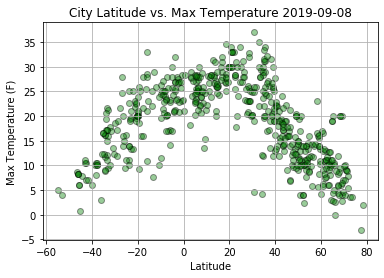

In [37]:
plt.scatter(WDF["Lat"], WDF["Max_Temp"], marker="o", color="g", edgecolors="k", alpha=.4)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature "+ str(DATE))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude_vs_Max_Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

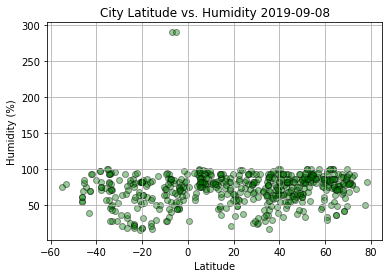

In [38]:
plt.scatter(WDF["Lat"], WDF["Humidity"], marker="o", color="g", edgecolors="k", alpha=.4)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity "+ str(DATE))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

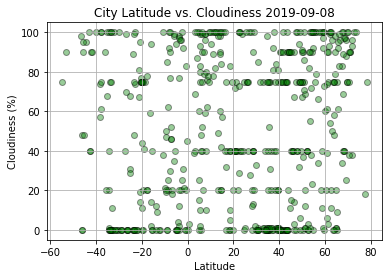

In [39]:
plt.scatter(WDF["Lat"], WDF["Cloudiness"], marker="o", color="g", edgecolors="k", alpha=.4)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness "+ str(DATE))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

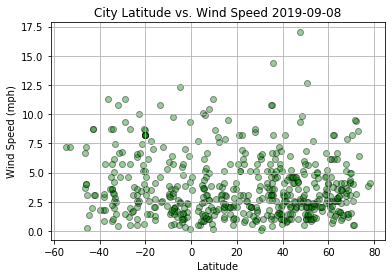

In [40]:
plt.scatter(WDF["Lat"], WDF["Wind_Speed"], marker="o", color="g", edgecolors="k", alpha=.4)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed "+ str(DATE))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude_vs_Wind_Speed.png")

# Show plot
plt.show()

In [41]:
# Observation 1: As expected, temperature can be proven to rise as you
# near the equator from either northern or southern latitudes.

In [42]:
# Observation 2: Wind, Cloudiness and Humidity variability seems rather
# uniform at any latitude.
# I don't know why but I thought it might have more range the further you
# travel from the equator.

In [43]:
# Observation 3: Temperature and Latitude do not necessarily affect Humidity, 
# Cloudiness, or Wind Speed.  I thought there would be some kind of direct
# relationship.  Maybe there is but this data does not articulate it.